In [1]:
# Load the necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
file_path = '/content/tcmb_aylik_veriler.csv'
data = pd.read_csv(file_path)

In [3]:
# Convert the date column to datetime format
data['Tarih'] = pd.to_datetime(data['Tarih'], format='%Y-%m')
data = data.sort_values('Tarih')

In [4]:
# Handle missing values by filling them with the mean of each column
data.fillna(data.mean(), inplace=True)

In [5]:
# Select the features for clustering
X = data[['tuketici_kredisi_faizi', '1_aylik_mevduat_faizi', '3_aylik_mevduat_faizi',
          'usd_mevduat_faizi', 'eur_mevduat_faizi', 'tuketici_fiyat_endeksi',
          'ito_gecinme_endeksi', 'reel_kesim_guven_endeksi', 'istihdam_orani',
          'issizlik_orani', 'toplam_sifir_konut_satisi', 'toplam_ikinciel_konut_satisi',
          'resmi_rezerv_varliklari', 'toplam_binek_otomobil_uretimi', 'usd_try', 'eur_try', 'gbp_try']]

In [6]:
# Create and train the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [7]:
# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the data
data['Cluster'] = labels

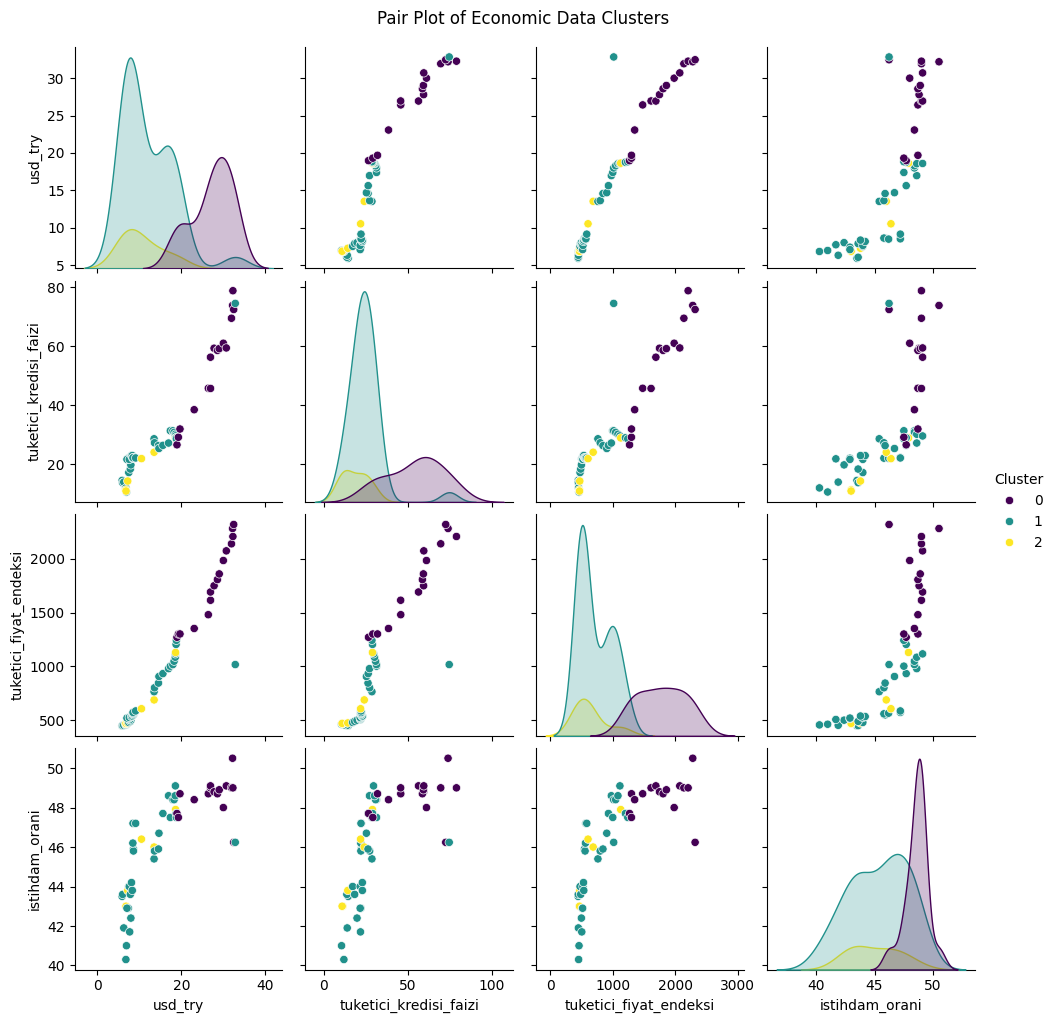

In [8]:
# Pair plot with seaborn
sns.pairplot(data[['usd_try', 'tuketici_kredisi_faizi', 'tuketici_fiyat_endeksi', 'istihdam_orani', 'Cluster']], hue='Cluster', palette='viridis')
plt.suptitle('Pair Plot of Economic Data Clusters', y=1.02)
plt.show()

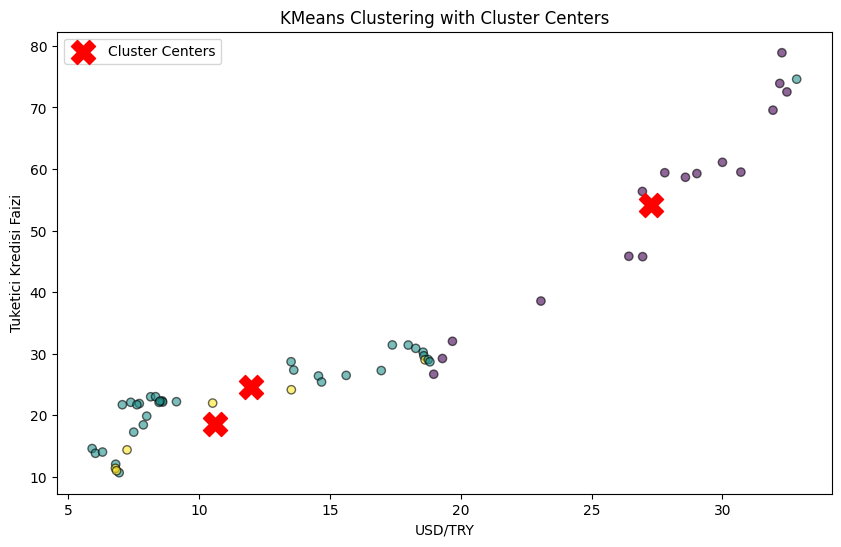

In [9]:
# Plot cluster centers using two features from X
plt.figure(figsize=(10, 6))
plt.scatter(data['usd_try'], data['tuketici_kredisi_faizi'], c=labels, cmap='viridis', alpha=0.6, edgecolor='k')
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, X.columns.get_loc('usd_try')], cluster_centers[:, X.columns.get_loc('tuketici_kredisi_faizi')],
            s=300, c='red', label='Cluster Centers', marker='X')
plt.xlabel('USD/TRY')
plt.ylabel('Tuketici Kredisi Faizi')
plt.title('KMeans Clustering with Cluster Centers')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

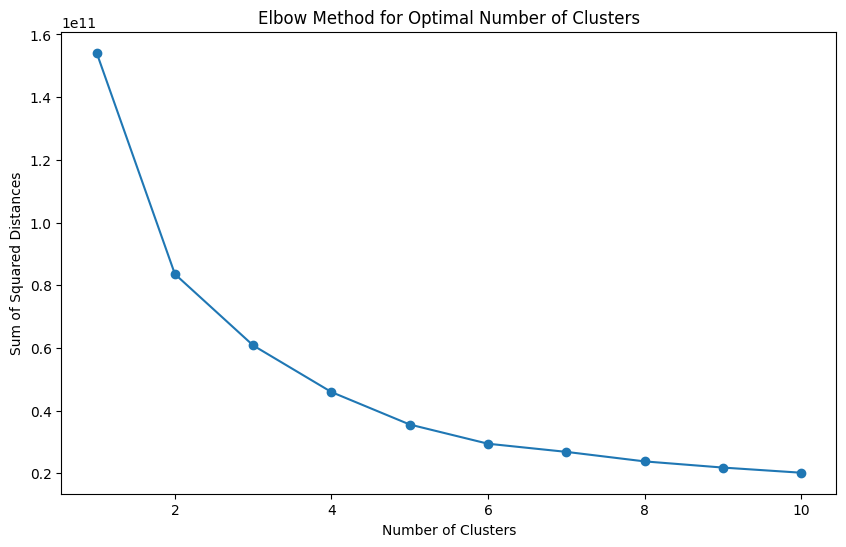

In [10]:
# Elbow method to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()